# Churn At Telco


# Project Goals

- Discover drivers of churn at Telco
- Use drivers to develop a machine learning model that accurately predicts customer churn
- Churning is defined as a customer cutting ties with the service(s) Telco provides
- This information could be used to further our understanding of how customers at Telco (and simliar companies) think and help other companies better understand consumer behavior


## Imports

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# machine learning imports 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from pydataset import data
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# import premade functions
import prepare
import acquire

#Removes big scary warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

* Data aquired from SQL telco_churn database
* It contained 7043 rows and 24 columns before cleaning
* Each row represents a customer
* Each column represents a feature associated of the customer


In [2]:
# Import acquired messy data

telco = acquire.get_telco_data()

## Prepare

Prepare Actions:

- Removed columns that did not contain useful information (payment_type_id, internet_service_type_id, etc.)
- Checked columns to promote readability (all were good)
- Checked for nulls in the data and dropped null values stored as white space (used .strip)
- Checked that column data types were appropriate and had to change total_charges to from object to a float
- Added additional features to investigate:
- Converted binary categorical variables to numeric (yes/no & male/female)
- Added dummy variables for the non-binary categorical variables and then concatenated them to the original dataframe
- Split data into train, validate and test (approx. 60/25/15), stratifying on 'churn'
- Outliers have not been removed for this iteration of the project

In [4]:
# Import prepare function to clean data 

telco = prepare.prep_telco(telco)

| Feature | Definition |
|:--------|:-----------|
|gender|Specifies if male or female|
|senior_citizen|True or False, specifies if senior citizen or not|
|partner|True or False, specifies if customer has partner or not|
|dependents|True or False, specifies if customer has partner or not|
|tenure|Integer, how many months the customer has been with Telco|
|phone_service|Yes or No, specifies if customer has phone service|
|multiple_lines|Yes or No, specifies if customer has multiple lines|
|online_security|Yes or No, specifies if customer has online security|
|online_backup|Yes or No, specifies if customer has online backup|
|device_protection|Yes or No, specifies if customer has device protection|
|tech_support|Yes or No, specifies if customer has tech support|
|streaming_tv|Yes or No, specifies if customer has streams tv|
|streaming_movies|Yes or No, specifies if customer streams movies|
|paperless_billing|Yes or No, specifies if customer has paperless billing|
|monthly_charges|Charges in a month, measured in dollars|
|total_charges|Total charges overal, measured in dollars|
|churn|The word used to define if a customer has left Telco|
|contract_type|Specifies contract type, month-to-month, two-year, one-year|
|payment_type|Specifies payment type, electronic check, mailed check, bank transfer, credit card|
|internet_service_type|Specifies internet service type, fiber optic, dsl, or none|

In [6]:
# splitting data into train, validate, and test
train, val, test = prepare.my_train_test_split(telco, 'churn_Yes')

# Explore

## Are customers with Tech Support more or less likely to churn?

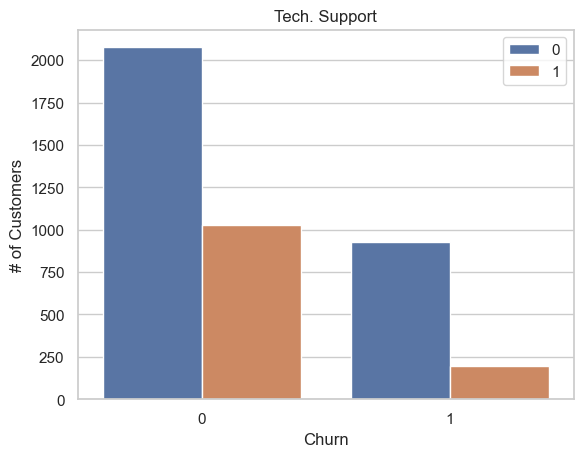

In [8]:
# using a countplot to give a visual 
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_Yes", hue="tech_support_Yes")
#labels and legend
plt.title('Tech. Support')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()

#### My takeaway from this is that there appears to be a relationship between having tech support and churn.  
  
  
##### For this question, there are two categorical variables at hand so a a chi-square test seems appropiate to determine if there is a relationship.

#### My H_o here is that there is no significant relationship between churn and tech support

#### My H_a is that there is a relationship of significance.

In [20]:
# observed data for chi-square test
observed1 = pd.crosstab(train.tech_support_Yes, train.churn_Yes)
observed1
# do not forget alpha
alpha = .05

chi2, p, degf, expected = stats.chi2_contingency(observed1)
# clean f strings
print(f"chi^2: {chi2}")
print(f"p value: {p}")

chi^2: 98.23088931064383
p value: 3.7233642021021574e-23


#### My p-value is very small, so we reject our null hypothesis. We can say with confidence that there is sigificance in the relationship between churn and Tech Support. This makes an adequate driver to model.

## What contract type churns the most?

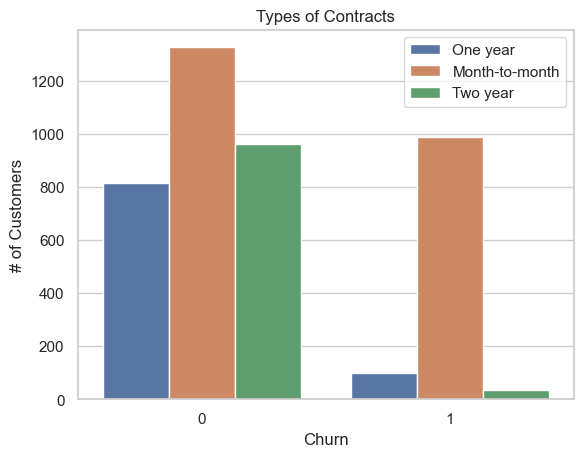

In [11]:
# trusty count plot for visual
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_Yes", hue="contract_type")
#labels and legend
plt.title('Types of Contracts')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()

#### We will investigate the question of whether contract type is independent of churn.

#### Ho (Null Hypothesis): contract type is independent of churn.

#### Ha (Alternative Hypothesis): contract is dependent on churn.

In [21]:
# observed data for chi-square test
observed2 = pd.crosstab(train.contract_type, train.churn_Yes)
observed2
# do not forget alpha
alpha = .05

chi2, p, degf, expected = stats.chi2_contingency(observed2)
# clean f strings
print(f"chi^2: {chi2}")
print(f"p value: {p}")

chi^2: 703.7870674341639
p value: 1.4947896745220748e-153


#### My p-value is very small, so we reject our null hypothesis. We can say with confidence that there is sigificance in the relationship between churn and contract type month-to-month. This makes another adequate driver to model.

## Does being a senior citizen have an affect on churn?

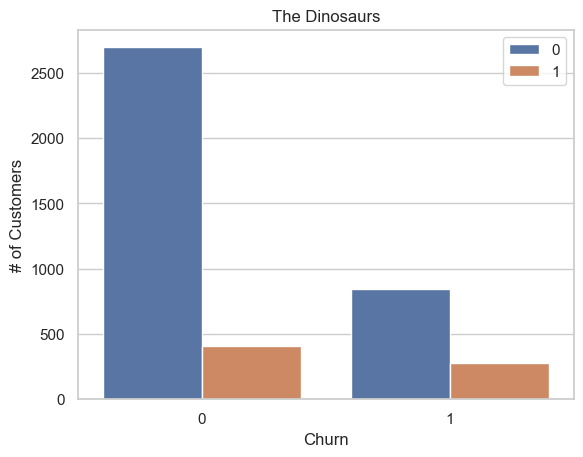

In [13]:
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_Yes", hue="senior_citizen")
#labels and legend
plt.title('The Dinosaurs')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()

#### We will investigate the question of whether being a senior citizen is independent of churn.

#### Ho (Null Hypothesis): senior citizen is independent of churn.

#### Ha (Alternative Hypothesis): senior citizen is dependent on churn.

In [22]:
# trusted chi-square test
observed3 = pd.crosstab(train.senior_citizen, train.churn_Yes)
observed3
# do not forget alpha
alpha = .05

chi2, p, degf, expected = stats.chi2_contingency(observed3)
# clean f strings
print(f"chi^2: {chi2}")
print(f"p value: {p}")

chi^2: 80.79361466512287
p value: 2.505662983276272e-19


#### My p-value is very small, so we reject our null hypothesis. We can say with confidence that there is sigificance in the relationship between churn and being a senior citizen. This makes another driver to model.

## Do customers who churn have paperless billing?

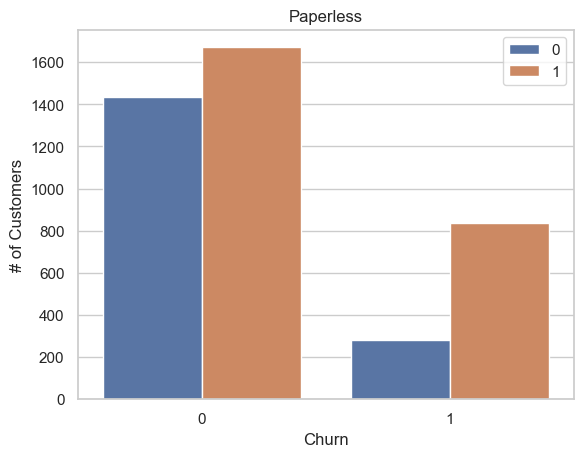

In [16]:
# count plot
sns.set_theme(style="whitegrid")
sns.countplot(data=train, x="churn_Yes", hue="paperless_billing_Yes")
# title and legend
plt.title('Paperless')
plt.xlabel('Churn')
plt.ylabel('# of Customers')
plt.legend()

#### We will investigate the question of whether contract type is independent of churn.

#### Ho (Null Hypothesis): paperless billing is independent of churn.

#### Ha (Alternative Hypothesis): paperless is dependent on churn.

In [23]:
observed4 = pd.crosstab(train.paperless_billing_Yes, train.churn_Yes)
observed4
# do not forget alpha
alpha = .05

chi2, p, degf, expected = stats.chi2_contingency(observed4)
# clean f strings
print(f"chi^2: {chi2}")
print(f"p value: {p}")

chi^2: 148.58446697144495
p value: 3.5348504574964642e-34


## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

## You may use this as a template for how to ask and answer each question:

### 1) Question about the data
* Ask a question about the data for which you got a meaningful result
* There is no connection can be a meaningful result

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* Be sure that you are not violating any of the assumptions for the statistical test you are choosing
* Your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

# Exploration Summary


* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [3]:
# If you use code to generate your baseline run the code and generate the output here



Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [4]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)



Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [5]:
# Code that runs the best overall model on test data (this may be imported from a module)



Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summary
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**